# Importamos las librerias

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargamos los datos de Coingecko.com

In [2]:
url = 'https://api.coingecko.com/api/v3/coins/markets'
parametro = {'vs_currency': 'usd', 'order': 'market_cap_desc', 'per_page': 10}
respuesta = requests.get(url, parametro=parametro)
criptomoneda = pd.DataFrame(respuesta.json())
criptomoneda


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26044.000000,506604532231,1,546544943621,12249680505,26155.000000,...,2.100000e+07,2.100000e+07,69045.000000,-62.34443,2021-11-10T14:24:11.849Z,67.810000,38241.81562,2013-07-06T00:00:00.000Z,None,2023-08-23T04:58:40.502Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1637.650000,196480159473,2,196480159473,10346561588,1666.860000,...,1.202143e+08,NaN,4878.260000,-66.51258,2021-11-10T14:24:19.604Z,0.432979,377194.09571,2015-10-20T00:00:00.000Z,"{'times': 83.06438046464602, 'currency': 'btc'...",2023-08-23T04:58:33.955Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999548,82806338674,3,82806338674,21618892425,1.004000,...,8.285333e+10,NaN,1.320000,-24.48158,2018-07-24T00:00:00.000Z,0.572521,74.52298,2015-03-02T00:00:00.000Z,None,2023-08-23T04:55:02.066Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,213.480000,32810892015,4,42651388346,792889536,214.430000,...,1.538562e+08,2.000000e+08,686.310000,-68.95107,2021-05-10T07:24:17.097Z,0.039818,535066.22661,2017-10-19T00:00:00.000Z,None,2023-08-23T04:58:37.009Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521338,27528500809,5,52096001936,1144349357,0.522798,...,9.998850e+10,1.000000e+11,3.400000,-84.66697,2018-01-07T00:00:00.000Z,0.002686,19298.55523,2014-05-22T00:00:00.000Z,None,2023-08-23T04:58:34.579Z
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.001000,25952324758,6,25960770630,4737429332,1.005000,...,2.593574e+10,NaN,1.170000,-14.71843,2019-05-08T00:40:28.300Z,0.877647,13.95273,2023-03-11T08:02:13.981Z,None,2023-08-23T04:58:35.440Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1634.690000,13621191772,7,13621191772,52463543,1667.910000,...,8.328984e+06,8.328984e+06,4829.570000,-66.18170,2021-11-10T14:40:47.256Z,482.900000,238.22558,2020-12-22T04:08:21.854Z,None,2023-08-23T04:58:27.858Z
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.259137,9074211652,8,11651855661,197391858,0.261727,...,4.500000e+10,4.500000e+10,3.090000,-91.61359,2021-09-02T06:00:10.474Z,0.019253,1244.64527,2020-03-13T02:22:55.044Z,None,2023-08-23T04:58:32.331Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.062720,8818870739,9,8818827492,322190878,0.063199,...,1.407022e+11,NaN,0.731578,-91.42553,2021-05-08T05:08:23.458Z,0.000087,72082.07246,2015-05-06T00:00:00.000Z,None,2023-08-23T04:58:31.831Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,20.610000,8400413379,10,11446623261,443033293,21.190000,...,5.556423e+08,NaN,259.960000,-92.06804,2021-11-06T21:54:35.825Z,0.500801,4017.37446,2020-05-11T19:35:23.449Z,None,2023-08-23T04:58:41.100Z


In [3]:
# Calcular la fecha de hace 10 años
historial_10 = (datetime.now() - timedelta(days=365*10)).strftime('%d-%m-%Y')

precio_historico = pd.DataFrame()
volumen_historico = pd.DataFrame()
capitalizacion_historica = pd.DataFrame()

top_10 = criptomoneda['id'].tolist()
for cripto in top_10:
    url = f'https://api.coingecko.com/api/v3/coins/{cripto}/market_chart'
    parametro = {'vs_currency': 'usd', 'days': '3650'}  # 3650 días equivalen aproximadamente a 10 años
    
    respuesta = requests.get(url, params=parametro)
    data = respuesta.json()
    
    precio = pd.DataFrame(data['prices'], columns=['timestamp', f'{cripto}'])
    volumen = pd.DataFrame(data['total_volumes'], columns=['timestamp', f'{cripto}'])
    capitalizacion = pd.DataFrame(data['market_caps'], columns=['timestamp', f'{cripto}'])
    
    precio['timestamp'] = pd.to_datetime(precio['timestamp'], unit='ms')
    volumen['timestamp'] = pd.to_datetime(volumen['timestamp'], unit='ms')
    capitalizacion['timestamp'] = pd.to_datetime(capitalizacion['timestamp'], unit='ms')
    
    precio.set_index('timestamp', inplace=True)
    volumen.set_index('timestamp', inplace=True)
    capitalizacion.set_index('timestamp', inplace=True)
    
    precio = precio.resample('D').last()
    volumen = volumen.resample('D').last()
    capitalizacion = capitalizacion.resample('D').last()
    
    if precio_historico.empty:
        precio_historico = precio
        volumen_historico = volumen
        capitalizacion_historica = capitalizacion
    else:
        precio_historico = precio_historico.join(precio, how='outer')
        volumen_historico = volumen_historico.join(volumen, how='outer')
        capitalizacion_historica = capitalizacion_historica.join(capitalizacion, how='outer')

precio_historico


,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
timestamp,,,,,,,,,,
2013-08-26,122.040000,NaN,NaN,NaN,0.006466,NaN,NaN,NaN,NaN,NaN
2013-08-27,125.670000,NaN,NaN,NaN,0.006420,NaN,NaN,NaN,NaN,NaN
2013-08-28,123.020000,NaN,NaN,NaN,0.006349,NaN,NaN,NaN,NaN,NaN
2013-08-29,123.440000,NaN,NaN,NaN,0.005820,NaN,NaN,NaN,NaN,NaN
2013-08-30,129.200000,NaN,NaN,NaN,0.006045,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-19,26042.838257,1660.679110,0.999381,215.972916,0.505539,0.999658,1659.990165,0.263688,0.063189,21.330196
2023-08-20,26104.778631,1669.233455,1.000243,217.075522,0.519734,1.000504,1668.863869,0.268186,0.063734,21.878330
2023-08-21,26160.700420,1682.461825,0.999208,216.240448,0.539032,0.999293,1683.121243,0.270308,0.063744,21.747537


In [4]:
# Reescalar los valores dividiendo por 1,000,000
volumen_historico = volumen_historico / 1e6

columna = [col for col in volumen_historico.columns]
volumen_historico.columns = columna

volumen_historico = volumen_historico.round(2)

volumen_historico['total'] = volumen_historico.sum(axis=1)
volumen_historico


,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
timestamp,,,,,,,,,,,
2013-08-26,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2013-08-27,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2013-08-28,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2013-08-29,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2013-08-30,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,18062.35,11856.91,28473.30,614.64,1918.96,4443.17,25.27,265.11,586.15,412.22,66658.08
2023-08-20,3355.04,8226.87,9788.60,385.40,929.70,1939.24,24.36,141.04,281.37,254.18,25325.80
2023-08-21,8304.37,6156.82,12729.51,282.62,1321.76,2958.01,5.06,141.55,231.08,200.00,32330.78


In [5]:
# Reescalar los valores dividiendo por 1,000,000
capitalizacion_historica = capitalizacion_historica / 1e6

columna = [col  for col in capitalizacion_historica.columns]
capitalizacion_historica.columns = columna
capitalizacion_historica = capitalizacion_historica.round(2)
capitalizacion_historica['total'] = capitalizacion_historica.sum(axis=1)

capitalizacion_historica

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
timestamp,,,,,,,,,,,
2013-08-26,1416.68,NaN,NaN,NaN,50.55,NaN,NaN,NaN,NaN,NaN,1467.23
2013-08-27,1459.37,NaN,NaN,NaN,50.19,NaN,NaN,NaN,NaN,NaN,1509.56
2013-08-28,1429.11,NaN,NaN,NaN,49.63,NaN,NaN,NaN,NaN,NaN,1478.74
2013-08-29,1434.59,NaN,NaN,NaN,45.50,NaN,NaN,NaN,NaN,NaN,1480.09
2013-08-30,1502.17,NaN,NaN,NaN,47.26,NaN,NaN,NaN,NaN,NaN,1549.43
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,506815.83,199322.88,82846.35,33229.78,26678.60,25990.99,13560.56,9235.49,8883.84,8681.70,915246.02
2023-08-20,508087.69,200676.42,82827.39,33409.55,27477.79,25986.05,13683.45,9404.36,8963.90,8915.14,919431.74
2023-08-21,509078.93,202267.39,82764.35,33283.45,28503.39,25989.25,13812.25,9483.52,8964.64,8865.95,923013.12


In [6]:
# El historial de 10 años del peso en relacion al dolar lo obtuve del siguiente link https://es.investing.com/currencies/usd-ars-historical-data
peso = pd.read_csv("datasets/Datos históricos USD_ARS.csv")
peso

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,21.08.2023,"350,0314","349,6124","350,0814","349,1715",NaN,"0,12%"
1,20.08.2023,"349,6124","349,7658","349,7658","349,4973",NaN,"-0,10%"
2,18.08.2023,"349,9500","350,0000","350,0350","349,9650",NaN,"0,00%"
3,17.08.2023,"349,9500","350,0000","350,0100","349,7900",NaN,"0,00%"
4,16.08.2023,"349,9500","350,0000","350,0250","349,9650",NaN,"0,00%"
...,...,...,...,...,...,...,...
2600,26.08.2013,"5,6310","5,6229","5,6339","5,6225",NaN,"0,18%"
2601,23.08.2013,"5,6210","5,6129","5,6249","5,6125",NaN,"0,13%"
2602,22.08.2013,"5,6137","5,6050","5,6161","5,6029",NaN,"0,23%"
2603,21.08.2013,"5,6010","5,5959","5,6049","5,5945",NaN,"0,09%"


Evolucion del peso frenbte al dolar

In [7]:
peso['Fecha'] = pd.to_datetime(peso['Fecha'], format='%d.%m.%Y')

peso.set_index('Fecha', inplace=True)

def limpiar_columna(valor):
    if isinstance(valor, str):
        return float(valor.replace(',', '.').replace('%', ''))
    return valor

columnas_a_limpiar = ['Último', 'Apertura', 'Máximo', 'Mínimo', '% var.']

for columna in columnas_a_limpiar:
    peso[columna] = peso[columna].apply(limpiar_columna)

def limpiar_volumen(valor):
    if isinstance(valor, str) and 'K' in valor:
        return float(valor.replace('K', '').replace(',', '.')) * 1000
    return valor

peso['Vol.'] = peso['Vol.'].apply(limpiar_volumen)

peso.fillna(peso.median(), inplace=True)

peso

,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
2023-08-21,350.0314,349.6124,350.0814,349.1715,70.0,0.12
2023-08-20,349.6124,349.7658,349.7658,349.4973,70.0,-0.10
2023-08-18,349.9500,350.0000,350.0350,349.9650,70.0,0.00
2023-08-17,349.9500,350.0000,350.0100,349.7900,70.0,0.00
2023-08-16,349.9500,350.0000,350.0250,349.9650,70.0,0.00
...,...,...,...,...,...,...
2013-08-26,5.6310,5.6229,5.6339,5.6225,70.0,0.18
2013-08-23,5.6210,5.6129,5.6249,5.6125,70.0,0.13
2013-08-22,5.6137,5.6050,5.6161,5.6029,70.0,0.23


Dataset de la evolucion de las criptomonedas criptomonedas en funcion del peso

In [8]:
combinado = precio_historico.merge(peso['Último'], left_index=True, right_index=True, how='left')

precio_peso_historico = pd.DataFrame(index=combinado.index)

for columna in precio_historico.columns:
    precio_peso_historico[columna] = combinado[columna] * combinado['Último']

precio_peso_historico

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
timestamp,,,,,,,,,,
2013-08-26,6.872072e+02,NaN,NaN,NaN,0.036409,NaN,NaN,NaN,NaN,NaN
2013-08-27,7.092186e+02,NaN,NaN,NaN,0.036231,NaN,NaN,NaN,NaN,NaN
2013-08-28,6.949769e+02,NaN,NaN,NaN,0.035866,NaN,NaN,NaN,NaN,NaN
2013-08-29,6.987938e+02,NaN,NaN,NaN,0.032947,NaN,NaN,NaN,NaN,NaN
2013-08-30,7.327320e+02,NaN,NaN,NaN,0.034283,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-20,9.126554e+06,583584.714296,349.697439,75892.294141,181.705299,349.788742,583455.502410,93.761126,22.282161,7648.935543
2023-08-21,9.157067e+06,588914.468101,349.754120,75690.946734,188.677987,349.783845,589145.284923,94.616131,22.312308,7612.320858


Inspección inicial de los datos: tipos de datos, dimensiones, primeras filas, etc.

In [9]:
criptomoneda.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation               int64
total_volume                          int64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [10]:
precio_historico.dtypes

bitcoin         float64
ethereum        float64
tether          float64
binancecoin     float64
ripple          float64
usd-coin        float64
staked-ether    float64
cardano         float64
dogecoin        float64
solana          float64
dtype: object

In [11]:
volumen_historico.dtypes

bitcoin         float64
ethereum        float64
tether          float64
binancecoin     float64
ripple          float64
usd-coin        float64
staked-ether    float64
cardano         float64
dogecoin        float64
solana          float64
total           float64
dtype: object

In [12]:
capitalizacion_historica.dtypes

bitcoin         float64
ethereum        float64
tether          float64
binancecoin     float64
ripple          float64
usd-coin        float64
staked-ether    float64
cardano         float64
dogecoin        float64
solana          float64
total           float64
dtype: object

In [13]:
precio_peso_historico.dtypes

bitcoin         float64
ethereum        float64
tether          float64
binancecoin     float64
ripple          float64
usd-coin        float64
staked-ether    float64
cardano         float64
dogecoin        float64
solana          float64
dtype: object

La mayoria de los datos son del tipo nuemerico lo que facilita el analisis estadistico

In [14]:
criptomoneda.shape

(10, 26)

In [15]:
precio_historico.shape

(3650, 10)

In [16]:
volumen_historico.shape

(3650, 11)

In [17]:
capitalizacion_historica.shape

(3650, 11)

In [18]:
precio_peso_historico.shape

(3650, 10)

In [19]:
criptomoneda.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26044.000000,506604532231,1,546544943621,12249680505,26155.000000,...,2.100000e+07,2.100000e+07,69045.00,-62.34443,2021-11-10T14:24:11.849Z,67.810000,38241.81562,2013-07-06T00:00:00.000Z,None,2023-08-23T04:58:40.502Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1637.650000,196480159473,2,196480159473,10346561588,1666.860000,...,1.202143e+08,NaN,4878.26,-66.51258,2021-11-10T14:24:19.604Z,0.432979,377194.09571,2015-10-20T00:00:00.000Z,"{'times': 83.06438046464602, 'currency': 'btc'...",2023-08-23T04:58:33.955Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999548,82806338674,3,82806338674,21618892425,1.004000,...,8.285333e+10,NaN,1.32,-24.48158,2018-07-24T00:00:00.000Z,0.572521,74.52298,2015-03-02T00:00:00.000Z,None,2023-08-23T04:55:02.066Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,213.480000,32810892015,4,42651388346,792889536,214.430000,...,1.538562e+08,2.000000e+08,686.31,-68.95107,2021-05-10T07:24:17.097Z,0.039818,535066.22661,2017-10-19T00:00:00.000Z,None,2023-08-23T04:58:37.009Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521338,27528500809,5,52096001936,1144349357,0.522798,...,9.998850e+10,1.000000e+11,3.40,-84.66697,2018-01-07T00:00:00.000Z,0.002686,19298.55523,2014-05-22T00:00:00.000Z,None,2023-08-23T04:58:34.579Z


In [20]:
precio_historico.head()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
timestamp,,,,,,,,,,
2013-08-26,122.04,NaN,NaN,NaN,0.006466,NaN,NaN,NaN,NaN,NaN
2013-08-27,125.67,NaN,NaN,NaN,0.006420,NaN,NaN,NaN,NaN,NaN
2013-08-28,123.02,NaN,NaN,NaN,0.006349,NaN,NaN,NaN,NaN,NaN
2013-08-29,123.44,NaN,NaN,NaN,0.005820,NaN,NaN,NaN,NaN,NaN
2013-08-30,129.20,NaN,NaN,NaN,0.006045,NaN,NaN,NaN,NaN,NaN


In [21]:
volumen_historico.head()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
timestamp,,,,,,,,,,,
2013-08-26,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2013-08-27,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2013-08-28,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2013-08-29,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2013-08-30,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [22]:
capitalizacion_historica.head()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
timestamp,,,,,,,,,,,
2013-08-26,1416.68,NaN,NaN,NaN,50.55,NaN,NaN,NaN,NaN,NaN,1467.23
2013-08-27,1459.37,NaN,NaN,NaN,50.19,NaN,NaN,NaN,NaN,NaN,1509.56
2013-08-28,1429.11,NaN,NaN,NaN,49.63,NaN,NaN,NaN,NaN,NaN,1478.74
2013-08-29,1434.59,NaN,NaN,NaN,45.50,NaN,NaN,NaN,NaN,NaN,1480.09
2013-08-30,1502.17,NaN,NaN,NaN,47.26,NaN,NaN,NaN,NaN,NaN,1549.43


In [23]:
precio_peso_historico.head()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
timestamp,,,,,,,,,,
2013-08-26,687.207240,NaN,NaN,NaN,0.036409,NaN,NaN,NaN,NaN,NaN
2013-08-27,709.218645,NaN,NaN,NaN,0.036231,NaN,NaN,NaN,NaN,NaN
2013-08-28,694.976886,NaN,NaN,NaN,0.035866,NaN,NaN,NaN,NaN,NaN
2013-08-29,698.793840,NaN,NaN,NaN,0.032947,NaN,NaN,NaN,NaN,NaN
2013-08-30,732.731960,NaN,NaN,NaN,0.034283,NaN,NaN,NaN,NaN,NaN


In [24]:
criptomoneda.isnull().sum()

id                                  0
symbol                              0
name                                0
image                               0
current_price                       0
market_cap                          0
market_cap_rank                     0
fully_diluted_valuation             0
total_volume                        0
high_24h                            0
low_24h                             0
price_change_24h                    0
price_change_percentage_24h         0
market_cap_change_24h               0
market_cap_change_percentage_24h    0
circulating_supply                  0
total_supply                        0
max_supply                          5
ath                                 0
ath_change_percentage               0
ath_date                            0
atl                                 0
atl_change_percentage               0
atl_date                            0
roi                                 9
last_updated                        0
dtype: int64

In [25]:
precio_historico.isnull().sum()

bitcoin            1
ethereum         712
tether           572
binancecoin     1485
ripple             5
usd-coin        1867
staked-ether    2676
cardano         1514
dogecoin         114
solana          2420
dtype: int64

In [26]:
volumen_historico.isnull().sum()

bitcoin            1
ethereum         712
tether           572
binancecoin     1485
ripple             5
usd-coin        1867
staked-ether    2676
cardano         1514
dogecoin         114
solana          2420
total              0
dtype: int64

In [27]:
capitalizacion_historica.isnull().sum()

bitcoin            2
ethereum         713
tether           572
binancecoin     1485
ripple             5
usd-coin        1867
staked-ether    2676
cardano         1514
dogecoin         115
solana          2420
total              0
dtype: int64

In [28]:
precio_peso_historico.isnull().sum()

bitcoin         1050
ethereum        1558
tether          1458
binancecoin     2111
ripple          1052
usd-coin        2383
staked-ether    2958
cardano         2131
dogecoin        1132
solana          2779
dtype: int64

Si bien parece que hay muchos datos nulos, esto se debe a que hay criptomonedas que fueron lanzadas hace menos de 10 años

In [69]:
# Diccionario para almacenar la fecha de lanzamiento de cada criptomoneda
lanzamiento = {
    'Bitcoin': '2009-01-03',
    'Ethereum': '2015-07-30',
    'Tether': '2015-02-10',
    'BNB': '2017-07-25',
    'XRP': '2012-08-02',
    'USD Coin': '2018-10-08',
    'Lido Staked Ether': '2020-12-18',
    'Cardano': '2017-09-29',
    'Solana': '2020-03-20',
    'Dogecoin': '2013-12-06'
}
criptomoneda['lanzamiento'] = criptomoneda['name'].map(lanzamiento)
criptomoneda
# Se agrega al dataset criptomoneda una columna con la fecha de lanzamiento de cada criptomoneda

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,volatilidad_mensual,volatilidad_peso_anualizada,volatilidad_peso_semestral,volatilidad_peso_trimestral,volatilidad_peso_mensual,volumen_promedio,dia_mayor_volumen,crecimiento_capitalizacion,volatilidad_capitalizacion,dominancia
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26044.00,506604532231,1,546544943621,12249680505,26155.00,...,0.16,0.50,0.35,0.25,0.14,14554.92,2021-01-04,356.95,297720.05,0.59
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1637.65,196480159473,2,196480159473,10346561588,1666.86,...,0.21,0.64,0.45,0.32,0.19,9331.17,2021-01-04,2439.53,130562.70,0.26
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,82806338674,3,82806338674,21618892425,1.00,...,0.01,0.07,0.05,0.03,0.02,26638.45,2021-11-03,276152.97,31376.35,0.06
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,213.48,32810892015,4,42651388346,792889536,214.43,...,0.25,0.72,0.51,0.36,0.21,894.60,2021-02-20,2966.81,28997.15,0.06
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.52,27528500809,5,52096001936,1144349357,0.52,...,0.30,0.93,0.65,0.46,0.27,1524.91,2022-07-18,543.58,15949.19,0.04
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.00,25952324758,6,25960770630,4737429332,1.00,...,0.01,0.07,0.05,0.04,0.02,2467.50,2022-08-10,1047.21,20331.69,0.05
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1634.69,13621191772,7,13621191772,52463543,1667.91,...,0.21,0.64,0.45,0.32,0.18,22.92,2023-01-24,3068.32,4093.33,0.02
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.26,9074211652,8,11651855661,197391858,0.26,...,0.25,0.77,0.55,0.39,0.22,956.16,2021-02-28,12.04,18934.93,0.04
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.06,8818870739,9,8818827492,322190878,0.06,...,0.63,2.00,1.41,1.00,0.58,585.78,2021-04-17,2525.90,10251.08,0.01
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,20.61,8400413379,10,11446623261,443033293,21.19,...,0.32,0.98,0.69,0.49,0.28,978.99,2021-09-08,1071.85,17131.26,0.04


Se procede al calculo de los valores faltantes despues de la fecha de lanzamiento de cada criptomoneda

In [30]:
def calculoNA(series, idx):
    prev_values = series.loc[:idx].dropna()
    if not prev_values.empty:
        prev_value = prev_values.iloc[-1]
    else:
        prev_value = None

    next_values = series.loc[idx:].dropna()
    if not next_values.empty:
        next_value = next_values.iloc[0]
    else:
        next_value = None

    if prev_value is not None and next_value is not None:
        avg_value = (prev_value + next_value) / 2
    elif prev_value is not None:
        avg_value = prev_value
    elif next_value is not None:
        avg_value = next_value
    else:
        avg_value = None

    return avg_value

def NA_fecha_lanzmiento(dataframe, fechas_lanzamiento):
    for columna in dataframe.columnas:
        if columna in fechas_lanzamiento:
            fecha_lanzamiento = fechas_lanzamiento[columna]
            data_despues_lanzamiento = dataframe.index > pd.Timestamp(fecha_lanzamiento)
            data_data_despues_lanzamiento = dataframe.loc[data_despues_lanzamiento, columna]
            indicesNA = data_data_despues_lanzamiento.index[data_data_despues_lanzamiento.isna()]
            for idx in indicesNA:
                dataframe.at[idx, columna] = calculoNA(dataframe[columna], idx)
    return dataframe

fechas_lanzamiento = criptomoneda.set_index('name')['lanzamiento'].to_dict()

precio_historico = NA_fecha_lanzmiento(precio_historico, fechas_lanzamiento)
volumen_historico = NA_fecha_lanzmiento(volumen_historico, fechas_lanzamiento)
capitalizacion_historica = NA_fecha_lanzmiento(capitalizacion_historica, fechas_lanzamiento)
precio_peso_historico = NA_fecha_lanzmiento(precio_peso_historico, fechas_lanzamiento)


Se procede a rellenar los datos faltante por el metodo de interpolacion

In [31]:
def interpolacion_datos_fecha_lanzamiento(dataframe, fecha_lanzamientos):
    for columna in dataframe.columnas:
        if columna in fecha_lanzamientos:
            fecha_lanzamiento = fecha_lanzamientos[columna]
            data_despues_lanzamiento = dataframe.index > pd.Timestamp(fecha_lanzamiento)
            dataframe.loc[data_despues_lanzamiento, columna] = dataframe.loc[data_despues_lanzamiento, columna].interpolate(method='linear')
    return dataframe

fecha_lanzamientos = criptomoneda.set_index('id')['lanzamiento'].to_dict()

precio_historico = interpolacion_datos_fecha_lanzamiento(precio_historico, fecha_lanzamientos)
volumen_historico = interpolacion_datos_fecha_lanzamiento(volumen_historico, fecha_lanzamientos)
capitalizacion_historica = interpolacion_datos_fecha_lanzamiento(capitalizacion_historica, fecha_lanzamientos)
precio_peso_historico = interpolacion_datos_fecha_lanzamiento(precio_peso_historico, fecha_lanzamientos)

Descripcion de los valores numericos del dataset

In [33]:
criptomoneda.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.00000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,5.000000e+00,10.000000,10.000000,10.000000,10.000000
mean,2955.327374,9.120974e+10,5.50000,9.920781e+10,5.190488e+09,2972.824672,2900.082192,-2.075426,-0.292774,-2.727633e+08,-0.346185,3.380800e+10,3.953388e+10,2.904587e+10,7970.881158,-66.296392,55.315579,104747.148665
std,8140.095869,1.570002e+11,3.02765,1.671619e+11,7.301401e+09,8173.901131,7993.992231,15.353865,1.229359,1.099914e+09,1.185677,4.705198e+10,5.134654e+10,4.417785e+10,21549.744399,27.295869,151.728563,190292.187020
min,0.062720,8.400413e+09,1.00000,8.818827e+09,5.246354e+07,0.063199,0.060500,-27.614030,-1.889450,-3.313294e+09,-2.096250,8.328984e+06,8.328984e+06,8.328984e+06,0.731578,-92.068040,0.000087,13.952730
25%,0.640891,1.021096e+10,3.25000,1.214419e+10,3.524015e+08,0.643099,0.629502,-0.298155,-1.299622,-1.350129e+08,-1.054860,1.286248e+08,1.286248e+08,2.100000e+07,1.762500,-89.735890,0.024394,489.830502
50%,10.805500,2.674041e+10,5.50000,3.430608e+10,9.686194e+08,11.097500,10.328573,-0.000179,0.000430,-2.025126e+07,-0.076565,1.316754e+10,1.324569e+10,2.000000e+08,131.680000,-67.731825,0.466890,11657.964845
75%,1279.387500,7.030748e+10,7.75000,7.512875e+10,8.944279e+09,1303.752500,1249.110000,0.000525,0.095250,1.364707e+07,0.047240,4.839266e+10,7.339000e+10,4.500000e+10,3793.755000,-63.303748,0.801365,63622.008250
max,26044.000000,5.066045e+11,10.00000,5.465449e+11,2.161889e+10,26155.000000,25575.000000,27.470000,2.290890,6.891771e+08,2.145520,1.407028e+11,1.407022e+11,1.000000e+11,69045.000000,-14.718430,482.900000,535066.226610


In [34]:
precio_historico.describe()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
count,3650.000000,2939.000000,3102.000000,2168.000000,3650.000000,1784.000000,975.000000,2136.000000,3539.000000,1230.000000
mean,12425.423694,882.280515,1.000431,158.270634,0.316211,1.001192,2197.519667,0.469788,0.037560,45.402428
std,15695.415333,1094.510007,0.018205,178.076797,0.358512,0.004538,918.299879,0.589978,0.078082,56.143199
min,121.770000,0.432979,0.572521,0.039818,0.002686,0.965578,596.767711,0.021321,0.000087,0.513923
25%,601.427500,126.778813,0.999860,14.381220,0.008297,0.999462,1564.568983,0.071873,0.000255,8.405597
50%,6613.631580,301.354933,1.000000,29.107537,0.253814,1.000405,1867.159722,0.251386,0.002489,24.399179
75%,19141.798969,1570.663585,1.001145,303.576817,0.458764,1.001777,2860.179660,0.516290,0.057622,44.022747
max,67617.015545,4815.004634,1.323095,675.098974,3.398450,1.043465,4775.452755,2.967075,0.681842,259.239558


In [35]:
volumen_historico.describe()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
count,3650.000000,2939.000000,3102.000000,2168.000000,3650.000000,1784.000000,975.000000,2136.000000,3539.000000,1230.000000,3.650000e+03
mean,14554.924304,9331.167889,26638.454329,894.597666,1524.905671,2467.497567,22.916687,956.160286,585.778577,978.985285,4.941846e+04
std,18481.139855,12355.779470,41054.660281,1526.042485,3050.311080,3426.090750,52.965567,1771.004182,2516.911924,1286.279354,7.244874e+04
min,0.000000,0.090000,0.000000,0.000000,0.000000,0.020000,0.000000,1.730000,0.000000,0.550000,0.000000e+00
25%,273.915000,384.575000,2.252500,131.622500,0.790000,462.122500,3.555000,106.082500,0.300000,114.555000,4.012050e+02
50%,4320.505000,6164.980000,15535.790000,360.355000,541.685000,1984.135000,10.250000,283.500000,30.390000,566.285000,8.045175e+03
75%,24705.147500,13606.180000,42877.320000,1089.707500,1861.480000,3635.185000,22.770000,844.527500,274.045000,1355.802500,8.172579e+04
max,178894.070000,140906.530000,926767.670000,22103.520000,62468.130000,110291.780000,834.990000,17436.010000,50960.650000,16149.090000,1.020120e+06


In [36]:
capitalizacion_historica.describe()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana,total
count,3.650000e+03,2939.000000,3102.000000,2168.000000,3650.000000,1784.000000,975.000000,2136.000000,3539.000000,1230.000000,3.650000e+03
mean,2.310417e+05,102320.354098,23002.247663,25246.903879,14078.069110,19586.752702,6137.879385,15037.681807,4959.976461,14312.785341,3.916488e+05
std,2.977200e+05,130562.704187,31376.352116,28997.150479,15949.194756,20330.487730,4093.330305,18934.930497,10251.081580,17131.256748,5.292190e+05
min,1.416680e+03,0.000000,0.140000,3.980000,21.940000,0.000000,0.000000,552.780000,1.620000,4.170000,4.642400e+02
25%,8.175535e+03,13572.255000,54.930000,1894.997500,252.990000,461.310000,3037.735000,2236.077500,24.835000,2213.090000,8.320448e+03
50%,1.141842e+05,29528.110000,2796.860000,4349.490000,10910.980000,9426.260000,5957.980000,6775.615000,300.060000,8762.480000,1.622987e+05
75%,3.617881e+05,188760.680000,62544.760000,48303.632500,20367.665000,41472.670000,8362.470000,17004.090000,7455.050000,14494.405000,6.918262e+05
max,1.278798e+06,571665.770000,83895.070000,110441.230000,131653.050000,56159.790000,15394.440000,95003.730000,88794.770000,77427.310000,2.319123e+06


In [37]:
precio_peso_historico.describe()

,bitcoin,ethereum,tether,binancecoin,ripple,usd-coin,staked-ether,cardano,dogecoin,solana
count,3.650000e+03,2939.000000,3102.000000,2166.000000,3650.000000,1782.000000,975.000000,2136.000000,3537.000000,1228.000000
mean,1.343791e+06,102335.208949,65.932196,20642.322758,27.472513,102.733500,289532.198955,49.162310,4.506450,5362.676971
std,2.083595e+06,148556.415295,62.851884,24617.008696,39.404050,60.505085,113822.764509,60.814779,8.468993,5589.185049
min,6.872072e+02,4.099311,4.999826,0.694620,0.021653,35.283663,49639.138227,0.373537,0.000777,34.594760
25%,6.180014e+03,4220.777270,15.868000,601.237038,0.104113,59.815769,204322.537781,3.077399,0.003463,779.679700
50%,1.913117e+05,12050.956246,43.495519,1730.985596,12.929453,91.062890,280648.987827,9.560056,0.105327,4296.119197
75%,2.720380e+06,205366.748281,96.185886,42630.755545,42.774719,120.659275,371061.202445,83.098271,5.360180,6363.997644
max,1.028874e+07,645137.511182,349.862554,84113.301740,222.106581,350.278663,644801.248496,290.153622,61.463699,25038.982971


In [38]:
fecha_corte = datetime.now() - timedelta(days=10*365)


# Evolucion de las criptomonedas en el tiempo

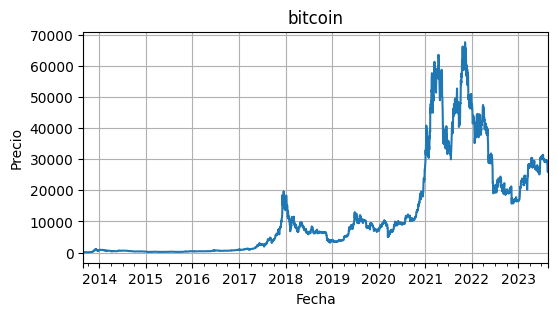

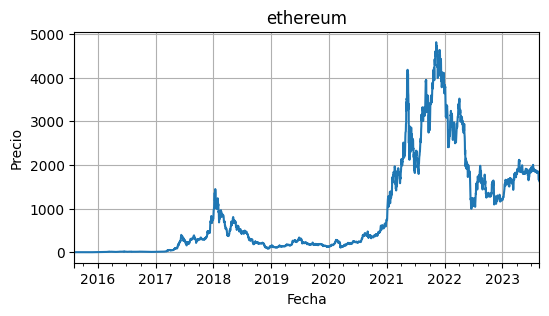

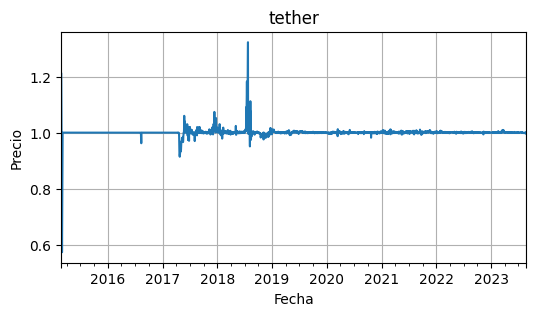

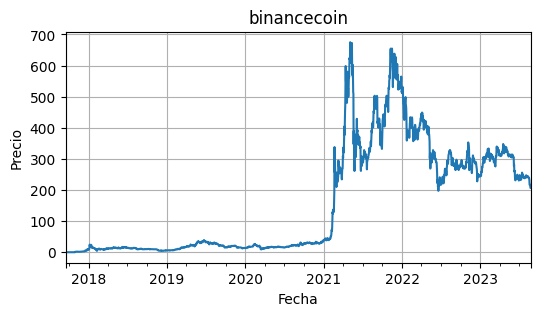

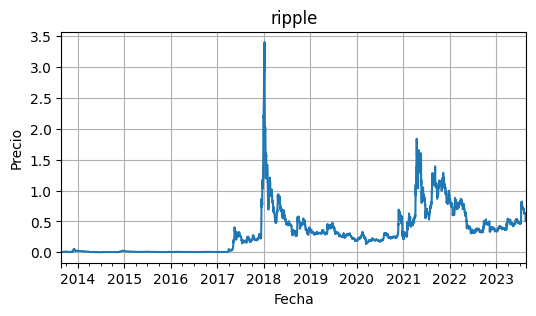

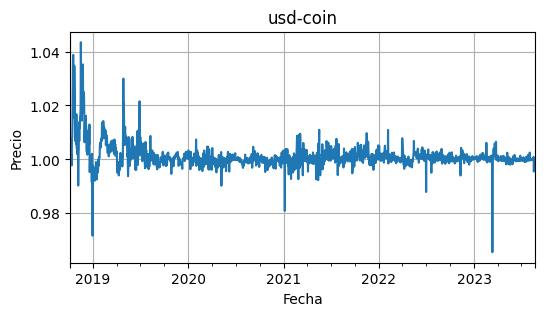

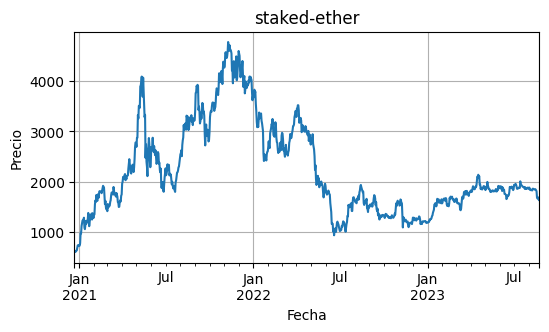

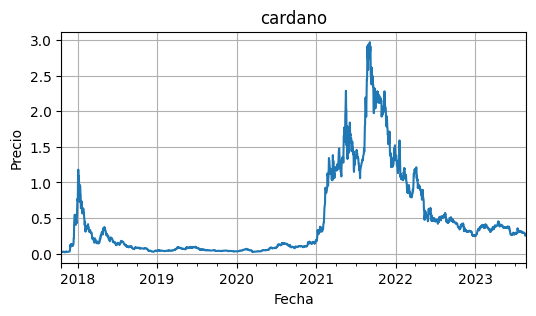

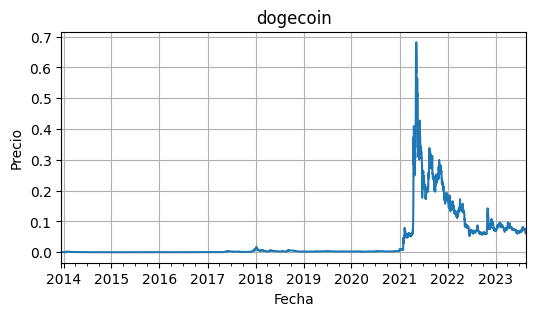

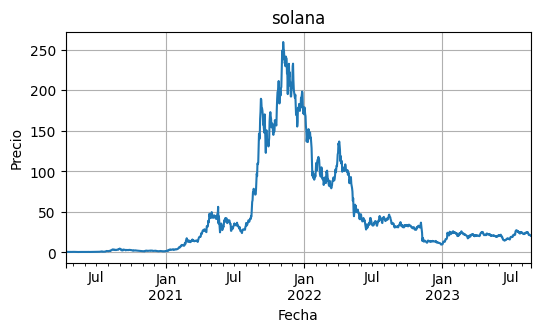

In [39]:
for columna in precio_historico.columns:
    fecha_lanzamiento = precio_historico[columna].first_valid_index()
    
    if fecha_lanzamiento > fecha_corte:
        plt.figure(figsize=(6, 3))
        precio_historico[columna].loc[fecha_lanzamiento:].plot(title=columna)
        plt.xlabel('Fecha')
        plt.ylabel('Precio')
        plt.grid(True)
        plt.show()

 De los graficos se puede apreciar que mayormente la evolucion de las criptomonedas los cambios bruscos se producen en casi todas en un mismo perido ( es muy visible en el año 2018 y 2022),
 
en que la mayoria de las criptomonedas subieron noteblemnete. Esto fue debido a un momento de mercado favorable para las criptomonedas. 

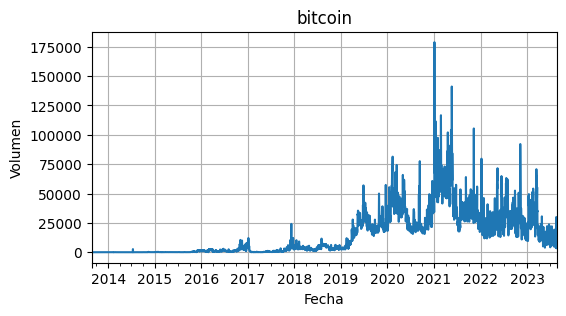

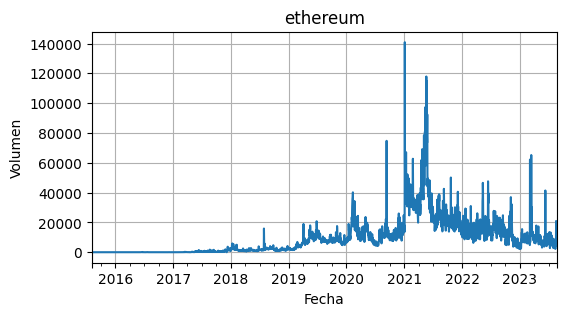

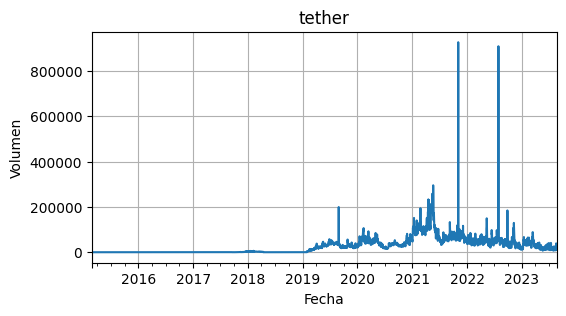

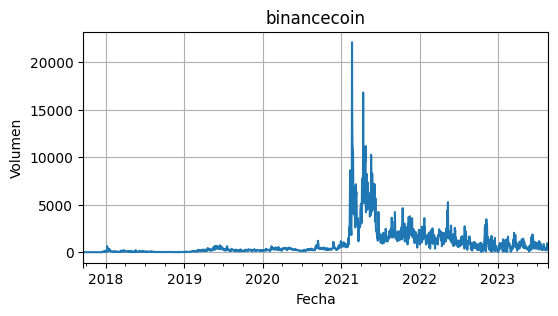

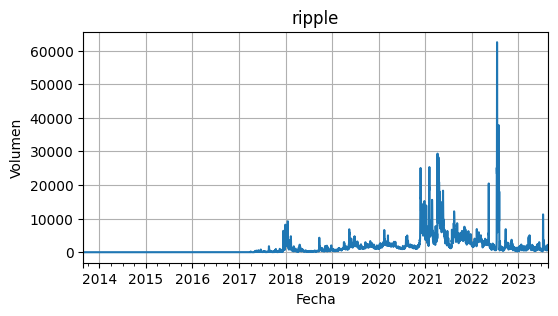

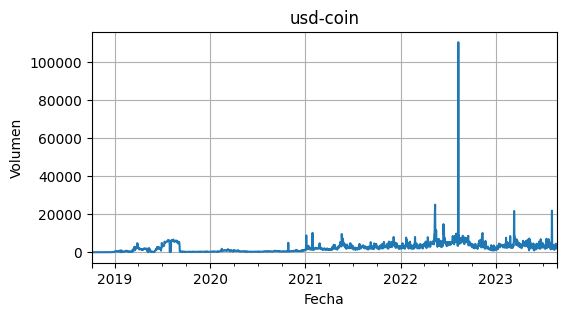

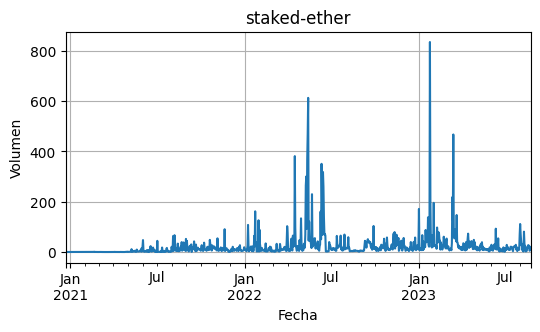

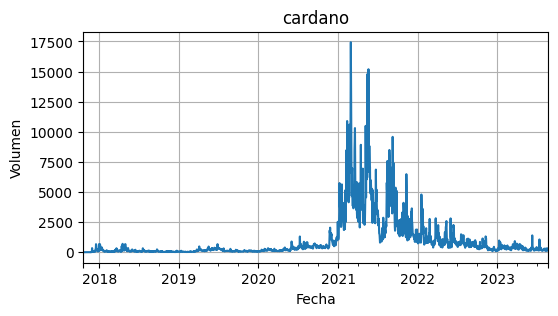

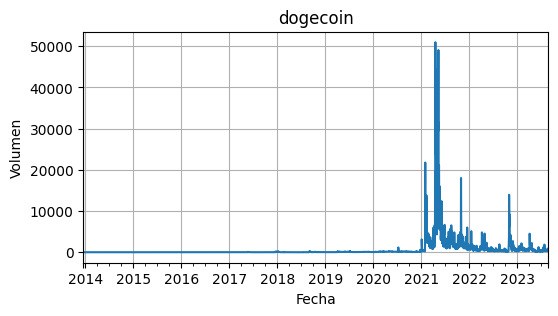

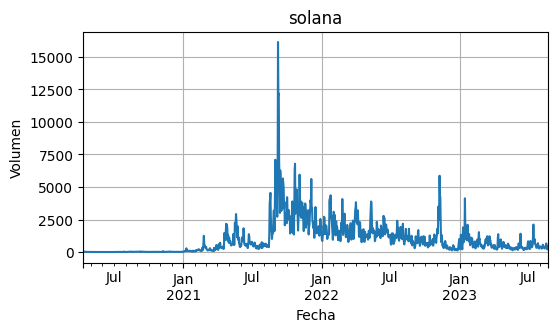

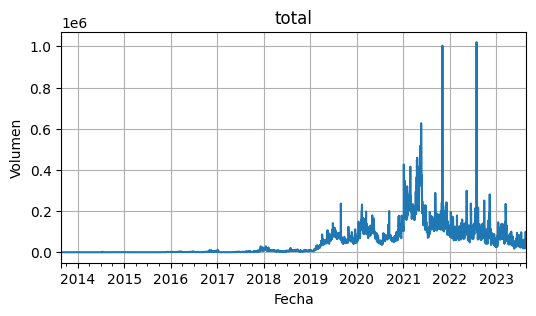

In [40]:
for columna in volumen_historico.columns:
    fecha_lanzamiento = volumen_historico[columna].first_valid_index()
    
    if fecha_lanzamiento > fecha_corte:
        plt.figure(figsize=(6, 3))
        volumen_historico[columna].loc[fecha_lanzamiento:].plot(title=columna)
        plt.xlabel('Fecha')
        plt.ylabel('Volumen')
        plt.grid(True)
        plt.show()

De la evolucion del volumen se puede apreciar que meses antes del 2022 (que fue el año en que las criptomonedas estuvieron en alza), 

especificamente en el 2021 hubo un mayor volumen de las criptomonedas. Es probable que despues de un gran volumen manejado se precedio un alza abrupta en las criptomonedas.

# Calculos de indicadores para el analisis 

In [41]:
precio_historico.index = pd.to_datetime(precio_historico.index)

criptomoneda['lanzamiento'] = pd.to_datetime(criptomoneda['lanzamiento'])


for columna in precio_historico.columns:
    fecha_inicio = criptomoneda.loc[columna, 'lanzamiento'] if columna in criptomoneda.index else None
    
    if fecha_inicio: 
        serie = precio_historico[columna].loc[fecha_inicio:].dropna()  
        
        result = seasonal_decompose(serie, model='additive', freq=365) 

        print(f"Descomposición de {columna} desde {fecha_inicio}")
        result.plot()
        plt.show()



In [42]:
fecha_inicio = pd.Timestamp('today') - pd.Timedelta(days=3650)
precio_historico_10 = precio_historico[precio_historico.index >= fecha_inicio]


In [43]:
# Calcular el ROI para diferentes periodos
roi_anual = (precio_historico_10.resample('A').last() - precio_historico_10.resample('A').first()) / precio_historico_10.resample('A').first() * 100
roi_semestral = (precio_historico_10.resample('6M').last() - precio_historico_10.resample('6M').first()) / precio_historico_10.resample('6M').first() * 100
roi_trimestral = (precio_historico_10.resample('3M').last() - precio_historico_10.resample('3M').first()) / precio_historico_10.resample('3M').first() * 100
roi_mensual = (precio_historico_10.resample('M').last() - precio_historico_10.resample('M').first()) / precio_historico_10.resample('M').first() * 100



In [44]:
fecha_inicio = pd.Timestamp('today') - pd.Timedelta(days=3650)
precio_peso_historico_10 = precio_peso_historico[precio_peso_historico.index >= fecha_inicio]

In [45]:
# Calcular el ROI para diferentes periodos para el peso
roi_peso_anual = (precio_peso_historico_10.resample('A').last() - precio_peso_historico_10.resample('A').first()) / precio_peso_historico_10.resample('A').first() * 100
roi_peso_semestral = (precio_peso_historico_10.resample('6M').last() - precio_peso_historico_10.resample('6M').first()) / precio_peso_historico_10.resample('6M').first() * 100
roi_peso_trimestral = (precio_peso_historico_10.resample('3M').last() - precio_peso_historico_10.resample('3M').first()) / precio_peso_historico_10.resample('3M').first() * 100
roi_peso_mensual = (precio_peso_historico_10.resample('M').last() - precio_peso_historico_10.resample('M').first()) / precio_peso_historico_10.resample('M').first() * 100

In [46]:
# Calcular el promedio de ROI para cada criptomoneda
roi_anual_mean = roi_anual.mean()
roi_semestral_mean = roi_semestral.mean()
roi_trimestral_mean = roi_trimestral.mean()
roi_mensual_mean = roi_mensual.mean()
roi_peso_anual_mean = roi_peso_anual.mean()
roi_peso_semestral_mean = roi_peso_semestral.mean()
roi_peso_trimestral_mean = roi_peso_trimestral.mean()
roi_peso_mensual_mean = roi_peso_mensual.mean()

In [47]:
if 'roi' in criptomoneda.columns:
    criptomoneda.drop(columns='roi', inplace=True)

criptomoneda['roi_anual'] = roi_anual_mean.values
criptomoneda['roi_semestral'] = roi_semestral_mean.values
criptomoneda['roi_trimestral'] = roi_trimestral_mean.values
criptomoneda['roi_mensual'] = roi_mensual_mean.values
criptomoneda['roi_peso_anual'] = roi_peso_anual_mean.values
criptomoneda['roi_peso_semestral'] = roi_peso_semestral_mean.values
criptomoneda['roi_peso_trimestral'] = roi_peso_trimestral_mean.values
criptomoneda['roi_peso_mensual'] = roi_peso_mensual_mean.values

In [48]:
criptomoneda['ath_date'] = pd.to_datetime(criptomoneda['ath_date'])
criptomoneda['atl_date'] = pd.to_datetime(criptomoneda['atl_date'])
criptomoneda['last_updated'] = pd.to_datetime(criptomoneda['last_updated'])


In [49]:
rois = ['roi_anual', 'roi_semestral', 'roi_trimestral', 'roi_mensual']
criptomoneda[rois] = criptomoneda[rois].apply(pd.to_numeric, errors='coerce')


In [50]:
def mejor_periodo(row):
    
    valores_roi = {
        'Anual': row['roi_anual'],
        'Semestral': row['roi_semestral'],
        'Trimestral': row['roi_trimestral'],
        'Mensual': row['roi_mensual']
    }
   
    periodo_max = max(valores_roi, key=valores_roi.get)
    
    return periodo_max

criptomoneda['mejor_periodo_roi'] = criptomoneda.apply(mejor_periodo, axis=1)

print(criptomoneda[['name', 'mejor_periodo_roi']])



                name mejor_periodo_roi
0            Bitcoin             Anual
1           Ethereum             Anual
2             Tether         Semestral
3                BNB             Anual
4                XRP             Anual
5           USD Coin         Semestral
6  Lido Staked Ether             Anual
7            Cardano             Anual
8           Dogecoin             Anual
9             Solana             Anual


Con el retorno de inversion (ROI) se analizaron los promedios de inversion en periodos mensuales, trimestrales, semestrales y anuales de lo cual se determino que en la mayoria la mejor inversion es hacerla por periodos de 1 año o mas.

Volatilidad

In [51]:
rendimientos_diarios = precio_historico.pct_change().dropna()

volatilidad_diaria = rendimientos_diarios.std()

volatilidad_anualizada = volatilidad_diaria * (252**0.5)

volatilidad_anualizada


bitcoin         0.557177
ethereum        0.727156
tether          0.038704
binancecoin     0.870284
ripple          1.032917
usd-coin        0.047722
staked-ether    0.724562
cardano         0.857006
dogecoin        2.180627
solana          1.114691
dtype: float64

El calculo del indicador de la volatilidad se calculo por año dando como resultado (en porcentaje) que tan volatil es una criptomoneda

In [52]:
rendimientos_peso_diarios = precio_peso_historico.pct_change().dropna()

volatilidad_peso_diaria = rendimientos_peso_diarios.std()

volatilidad_peso_anualizada = volatilidad_peso_diaria * (252**0.5)

volatilidad_peso_anualizada

bitcoin         0.501286
ethereum        0.642594
tether          0.069729
binancecoin     0.724652
ripple          0.926154
usd-coin        0.071421
staked-ether    0.640330
cardano         0.772014
dogecoin        1.997317
solana          0.979002
dtype: float64

En peso se puede observar que en general son un poco menos volatiles

In [53]:
volatilidad_semestral = volatilidad_anualizada * (0.5**0.5)
volatilidad_trimestral = volatilidad_anualizada * (0.25**0.5)
volatilidad_mensual = volatilidad_anualizada * (1/12**0.5)
volatilidad_peso_semestral = volatilidad_peso_anualizada * (0.5**0.5)
volatilidad_peso_trimestral = volatilidad_peso_anualizada * (0.25**0.5)
volatilidad_peso_mensual = volatilidad_peso_anualizada * (1/12**0.5)


In [54]:
for crypto in volatilidad_anualizada.index:
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_anualizada'] = volatilidad_anualizada[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_semestral'] = volatilidad_semestral[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_trimestral'] = volatilidad_trimestral[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_mensual'] = volatilidad_mensual[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_peso_anualizada'] = volatilidad_peso_anualizada[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_peso_semestral'] = volatilidad_peso_semestral[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_peso_trimestral'] = volatilidad_peso_trimestral[crypto]
    criptomoneda.loc[criptomoneda['id'] == crypto, 'volatilidad_peso_mensual'] = volatilidad_peso_mensual[crypto]


In [55]:
volumen_promedio = volumen_historico.mean()
dia_mayor_volumen = volumen_historico.idxmax()

criptomoneda['volumen_promedio'] = criptomoneda['id'].map(volumen_promedio)
criptomoneda['dia_mayor_volumen'] = criptomoneda['id'].map(dia_mayor_volumen)

print(criptomoneda[['id', 'volumen_promedio', 'dia_mayor_volumen']])


             id  volumen_promedio dia_mayor_volumen
0       bitcoin      14554.924304        2021-01-04
1      ethereum       9331.167889        2021-01-04
2        tether      26638.454329        2021-11-03
3   binancecoin        894.597666        2021-02-20
4        ripple       1524.905671        2022-07-18
5      usd-coin       2467.497567        2022-08-10
6  staked-ether         22.916687        2023-01-24
7       cardano        956.160286        2021-02-28
8      dogecoin        585.778577        2021-04-17
9        solana        978.985285        2021-09-08


El volumen es un indicador de que tan popular es una criptomoneda. 

La fecha del mayor volumen conicide en los momentos en que las criptomonedas en general subiron a valores record.

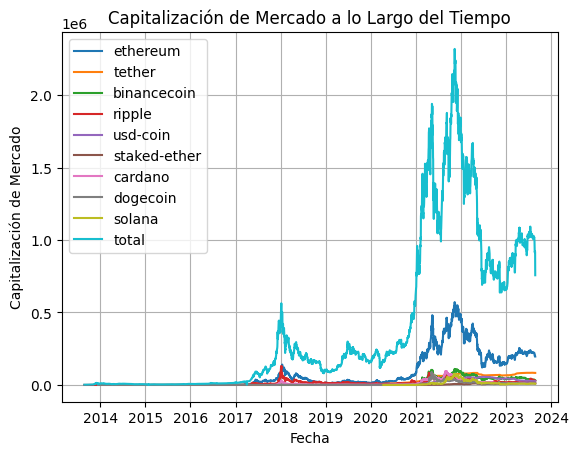

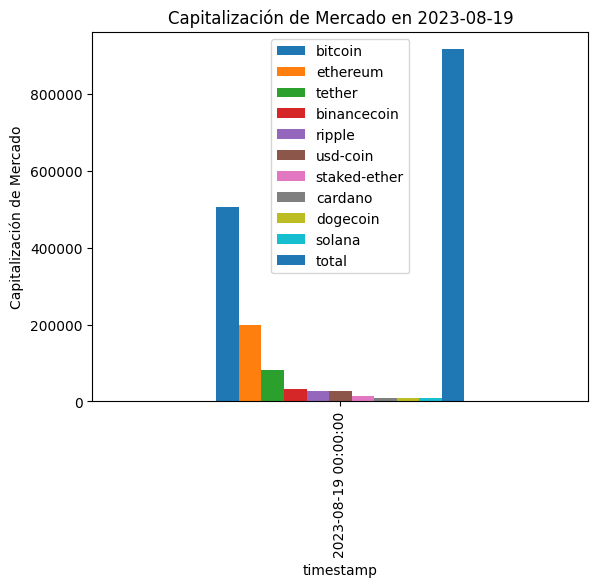

In [56]:
import matplotlib.pyplot as plt

# Iterar a través de todas las criptomonedas en el dataset
for criptomonedas in capitalizacion_historica.columns[1:]:  # Excluimos la columna de 'fecha'
    plt.plot(capitalizacion_historica.index, capitalizacion_historica[criptomonedas], label=criptomonedas)

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado')
plt.legend(loc='upper left')
plt.title('Capitalización de Mercado a lo Largo del Tiempo')
plt.grid(True)
plt.show()


# Comparación entre criptomonedas en una fecha específica
fecha_especifica = '2023-08-19'  # reemplazar con una fecha de tu dataset
capitalizacion_en_fecha = capitalizacion_historica[capitalizacion_historica.index == fecha_especifica]
capitalizacion_en_fecha.plot(kind='bar')
plt.title('Capitalización de Mercado en ' + fecha_especifica)
plt.ylabel('Capitalización de Mercado')
plt.show()


In [57]:
for indice, columna in criptomoneda.iterrows():
    moneda_id = columna['id']  
    if moneda_id != 'total':  
        fecha_lanzamiento = columna['lanzamiento']
        mascara = capitalizacion_historica.indice < fecha_lanzamiento
        capitalizacion_historica.loc[mascara, moneda_id] = None  

for moneda_id in criptomoneda['id']: 
    if moneda_id in capitalizacion_historica.columns and moneda_id != 'total': 
        data = capitalizacion_historica[moneda_id].dropna()
              
        valor_inicial = data[data > 0].iloc[0] if not data.empty else None
        
        if valor_inicial:  
            crecimiento = (data.iloc[-1] - valor_inicial) / valor_inicial
            criptomoneda.loc[criptomoneda['id'] == moneda_id, 'crecimiento_capitalizacion'] = crecimiento
            criptomoneda.loc[criptomoneda['id'] == moneda_id, 'volatilidad_capitalizacion'] = capitalizacion_historica[moneda_id].std()

for moneda_id in criptomoneda['id']:
    if moneda_id in capitalizacion_historica.columns and moneda_id != 'total':
        criptomoneda.loc[criptomoneda['id'] == moneda_id, 'dominancia'] = capitalizacion_historica[moneda_id].mean() / capitalizacion_historica['total'].mean()


               bitcoin  ethereum    tether  binancecoin    ripple  usd-coin  \
bitcoin       1.000000  0.940967  0.826294     0.889037  0.795950  0.551853   
ethereum      0.940967  1.000000  0.877881     0.956787  0.770954  0.714078   
tether        0.826294  0.877881  1.000000     0.896008  0.600842  0.912285   
binancecoin   0.889037  0.956787  0.896008     1.000000  0.622609  0.791055   
ripple        0.795950  0.770954  0.600842     0.622609  1.000000  0.453936   
usd-coin      0.551853  0.714078  0.912285     0.791055  0.453936  1.000000   
staked-ether -0.347488 -0.007592  0.800765     0.034737 -0.159019  0.421571   
cardano       0.869868  0.884327  0.622727     0.815319  0.748422  0.474781   
dogecoin      0.816328  0.865942  0.727053     0.848200  0.724643  0.501647   
solana        0.682521  0.873543  0.544713     0.789262  0.655028  0.488898   
total         0.987635  0.981946  0.881066     0.949693  0.808103  0.671686   

              staked-ether   cardano  dogecoin    s

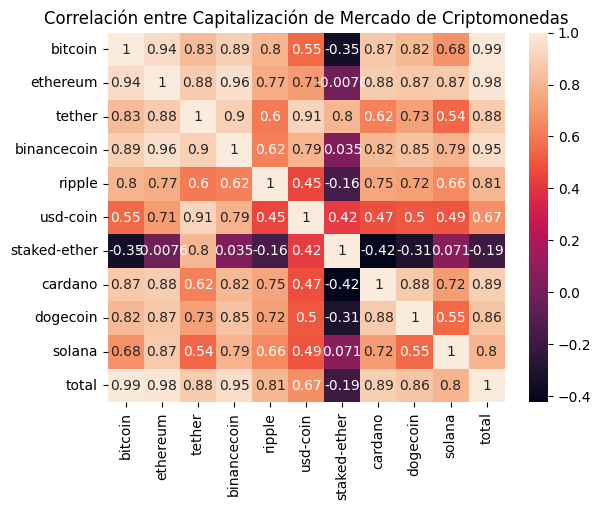

In [58]:
# Correlación entre criptomonedas
correlaciones = capitalizacion_historica.corr()
print(correlaciones)
sns.heatmap(correlaciones, annot=True)
plt.title('Correlación entre Capitalización de Mercado de Criptomonedas')
plt.show()


# Vamos a interpretar algunos de los resultados:

1. **Bitcoin y Ethereum** : Tienen una correlación muy alta y positiva, lo que significa que cuando la capitalización de mercado de Bitcoin aumenta, la de Ethereum tiende a aumentar en una proporción similar y viceversa.
2. **Tether y USD-Coin** : También tienen una alta correlación positiva, indicando que se mueven de manera similar en términos de capitalización de mercado. Esto tiene sentido ya que ambas son stablecoins.
3. **Staked-Ether y Bitcoin** : Tienen una correlación negativa, aunque no es muy fuerte. Esto indica que generalmente, cuando la capitalización de mercado de Bitcoin aumenta, la de Staked-Ether tiende a disminuir en cierta medida, y viceversa.
4. **Cardano y Dogecoin** : Tienen una alta correlación positiva, lo que sugiere que se mueven de manera similar en términos de capitalización de mercado.

In [59]:
criptomoneda

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,volatilidad_mensual,volatilidad_peso_anualizada,volatilidad_peso_semestral,volatilidad_peso_trimestral,volatilidad_peso_mensual,volumen_promedio,dia_mayor_volumen,crecimiento_capitalizacion,volatilidad_capitalizacion,dominancia
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26044.000000,506604532231,1,546544943621,12249680505,26155.000000,...,0.160843,0.501286,0.354463,0.250643,0.144709,14554.924304,2021-01-04,356.952812,297720.046183,0.589921
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1637.650000,196480159473,2,196480159473,10346561588,1666.860000,...,0.209912,0.642594,0.454382,0.321297,0.185501,9331.167889,2021-01-04,2439.530744,130562.704187,0.261255
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999548,82806338674,3,82806338674,21618892425,1.004000,...,0.011173,0.069729,0.049306,0.034864,0.020129,26638.454329,2021-11-03,276152.966667,31376.352116,0.058732
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,213.480000,32810892015,4,42651388346,792889536,214.430000,...,0.251229,0.724652,0.512406,0.362326,0.209189,894.597666,2021-02-20,2966.813607,28997.150479,0.064463
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.521338,27528500809,5,52096001936,1144349357,0.522798,...,0.298177,0.926154,0.654890,0.463077,0.267358,1524.905671,2022-07-18,543.579624,15949.194756,0.035946
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.001000,25952324758,6,25960770630,4737429332,1.005000,...,0.013776,0.071421,0.050502,0.035711,0.020618,2467.497567,2022-08-10,1047.213015,20331.691466,0.050095
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1634.690000,13621191772,7,13621191772,52463543,1667.910000,...,0.209163,0.640330,0.452782,0.320165,0.184847,22.916687,2023-01-24,3068.319005,4093.330305,0.015672
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.259137,9074211652,8,11651855661,197391858,0.261727,...,0.247396,0.772014,0.545896,0.386007,0.222861,956.160286,2021-02-28,12.037283,18934.930497,0.038396
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.062720,8818870739,9,8818827492,322190878,0.063199,...,0.629493,1.997317,1.412317,0.998659,0.576576,585.778577,2021-04-17,2525.896848,10251.081580,0.012664
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,20.610000,8400413379,10,11446623261,443033293,21.190000,...,0.321784,0.979002,0.692259,0.489501,0.282614,978.985285,2021-09-08,1071.849298,17131.256748,0.036545


En el dataset criptomonedas se almacenaron los valores de los indicadores relevantes luego del analisis de los datos obtenidos

# Se guardan los dataset para se utilizados en Power Bi

In [60]:
criptomoneda = criptomoneda.round(2)
precio_historico = precio_historico.round(2)
volumen_historico = volumen_historico.round(2)
capitalizacion_historica = capitalizacion_historica.round(2)
precio_peso_historico = precio_peso_historico.round(2)

In [67]:
criptomoneda.to_csv('datasets/criptomoneda.csv')
precio_historico.to_csv('datasets/precio_historico.csv')
volumen_historico.to_csv('datasets/volumen_historico_en_millones.csv')
capitalizacion_historica.to_csv('datasets/capitalizacion_historica_en_millones.csv')
precio_peso_historico.to_csv('datasets/precio_peso_historico.csv')
